## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
import pickle
from mlxtend.data import loadlocal_mnist

## Setting Numpy Seed

In [2]:
np.random.seed(10)

## Processing MNIST Dataset

In [3]:
def process_mnist_data() -> (np.ndarray, np.ndarray, np.ndarray, np.ndarray):
    mnist_path = './MNIST/'
    train_images, train_labels = loadlocal_mnist(
        images_path = mnist_path + './train-images.idx3-ubyte',
        labels_path = mnist_path + './train-labels.idx1-ubyte'
    )
    test_images, test_labels = loadlocal_mnist(
        images_path = mnist_path + './t10k-images.idx3-ubyte',
        labels_path = mnist_path + './t10k-labels.idx1-ubyte'
    )
    return train_images, train_labels, test_images, test_labels

## Processing CIFAR-10 Dataset

In [4]:
def unpickle(file):
    with open(file, 'rb') as fo:
        data_dict = pickle.load(fo, encoding='bytes')
    return data_dict

In [5]:
def process_cifar_dataset() -> (np.ndarray, np.ndarray, np.ndarray, np.ndarray):
    cifar_path = './cifar-10-python/cifar-10-batches-py'
    data_batch = unpickle(cifar_path + '/data_batch_1')
    train_images, train_labels = data_batch[b'data'], np.array(data_batch[b'labels'])
    for i in range(2,6):
        data_batch = unpickle(cifar_path + '/data_batch_' + str(i))
        train_images = np.concatenate((train_images, data_batch[b'data']), axis=0)
        train_labels = np.concatenate((train_labels, np.array(data_batch[b'labels'])), axis=0)
    test_batch = unpickle(cifar_path + '/test_batch')
    test_images, test_labels = test_batch[b'data'], np.array(test_batch[b'labels'])
    return train_images, train_labels, test_images, test_labels

## Processing Toy Dataset

In [6]:
def process_toy_dataset():
    toy_dataset_path = './Toy Dataset/'
    a = np.loadtxt(toy_dataset_path + 'trainNN.txt')
    b = np.loadtxt(toy_dataset_path + 'testNN.txt')
    train_x, train_y, test_x, test_y = a[:, 0:4], a[:, -1], b[:, 0:4], b[:, -1]
    return train_x, train_y, test_x, test_y

In [7]:
x_train_toy, y_train_toy, x_test_toy, y_test_toy = process_toy_dataset()
toy_batch_1 = x_train_toy[0:50].reshape(50, 2, 2, 1)
toy_batch_1[0, :, :, 0]

array([[ 9.21323266, 11.82445528],
       [16.69098092, 19.56967227]])

In [8]:
label_binarizer = LabelBinarizer()
label_binarizer.fit(range(1,5))
toy_labels_1 = label_binarizer.transform(y_train_toy[0:50].T)
toy_labels_1

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 1,

## Parsing Input Model

In [9]:
def parse_input_model():
    path = './input_model.txt'
    model = []
    with open(path, 'r') as f:
        lines = f.readlines()
        for line in lines:
            tokens = line.split()
            if tokens[0] == 'Conv':
                model.append(ConvolutionLayer(int(tokens[1]), int(tokens[2]), int(tokens[3]), int(tokens[4])))
            if tokens[0] == 'ReLU':
                model.append(ActivationLayer())
            if tokens[0] == 'Pool':
                model.append(MaxPoolingLayer(int(tokens[1]), int(tokens[2])))
            if tokens[0] == 'FC':
                model.append(FlatteningLayer())
                model.append(FullyConnectedLayer(int(tokens[1])))
            if tokens[0] == 'Softmax':
                model.append(SoftmaxLayer())
        return model

## ReLU Function

In [10]:
def relu(matrix:np.ndarray) -> np.ndarray:
    return matrix * (matrix > 0)

## Convolution Layer

In [11]:
class ConvolutionLayer:
    def __init__(self, output_channel_count: int, filter_dimension: int, stride: int, padding: int):
        self.output_channel_count = output_channel_count
        self.filter_dimension = filter_dimension
        self.stride = stride
        self.padding = padding

    def forward(self, input_image: np.ndarray) -> np.ndarray:
        input_dimentions = input_image.shape[0]
        output_dimentions = (input_dimentions - self.filter_dimension + 2 * self.padding) // self.stride + 1
        input_shape = input_image.shape

        filters = np.random.rand(
            self.output_channel_count,
            self.filter_dimension,
            self.filter_dimension,
            input_shape[2]
        )

        bias = np.random.rand(self.output_channel_count)

        padded_image = np.pad(input_image, [(self.padding,self.padding), (self.padding,self.padding), (0,0)], mode='constant') * 1.0
        padded_image /= 255.0
        padded_dimensions = padded_image.shape

        output = np.zeros((output_dimentions, output_dimentions, self.output_channel_count))

        image_y = out_y = 0
        while image_y + self.filter_dimension <= padded_dimensions[1]:
            image_x = out_x = 0
            while image_x + self.filter_dimension <= padded_dimensions[0]:
                image_slice = padded_image[image_x:image_x+self.filter_dimension, image_y:image_y+self.filter_dimension, :]
                output[out_x, out_y, :] = np.sum(image_slice * filters) + bias
                image_x += self.stride
                out_x += 1
            image_y += self.stride
            out_y += 1

        return output

    def backward(self):
        pass

In [12]:
class ConvolutionLayerBatch:
    def __init__(self, output_channel_count: int, filter_dimension: int, stride: int, padding: int):
        self.output_channel_count = output_channel_count
        self.filter_dimension = filter_dimension
        self.stride = stride
        self.padding = padding

    def forward(self, input_batch: np.ndarray) -> np.ndarray:
        input_dimentions = input_batch.shape
        output_dimentions = (input_dimentions[1] - self.filter_dimension + 2 * self.padding) // self.stride + 1
        input_shape = input_batch.shape

        filters = np.random.rand(
            self.output_channel_count,
            self.filter_dimension,
            self.filter_dimension,
            input_shape[3],
        )

        bias = np.random.rand(self.output_channel_count)

        padded_image = np.pad(input_batch, [(0, 0), (self.padding,self.padding), (self.padding,self.padding), (0,0)], mode='constant') * 1.0
        padded_image /= 255.0
        padded_dimensions = padded_image.shape

        output = np.zeros((input_dimentions[0], output_dimentions, output_dimentions, self.output_channel_count))

        for i in range(input_dimentions[0]):
            image_y = out_y = 0
            while image_y + self.filter_dimension <= padded_dimensions[2]:
                image_x = out_x = 0
                while image_x + self.filter_dimension <= padded_dimensions[1]:
                    image_slice = padded_image[i, image_x:image_x+self.filter_dimension, image_y:image_y+self.filter_dimension, :]
                    output[i, out_x, out_y, :] = np.sum(image_slice * filters) + bias
                    image_x += self.stride
                    out_x += 1
                image_y += self.stride
                out_y += 1

        return output

    def backward(self):
        pass

In [13]:
test_conv = ConvolutionLayerBatch(3, 2, 2, 2)
test_conv_out = test_conv.forward(toy_batch_1)
test_conv_out.shape

(50, 3, 3, 3)

In [14]:
test_conv_out[0, :, :, 0]

array([[0.00394827, 0.00394827, 0.00394827],
       [0.00394827, 0.35971887, 0.00394827],
       [0.00394827, 0.00394827, 0.00394827]])

## Activation Layer

In [15]:
class ActivationLayer:
    def __init__(self):
        pass

    def forward(self, input_matrix: np.ndarray) -> np.ndarray:
        return relu(input_matrix)

    def backward(self):
        pass

In [16]:
test_activation = ActivationLayer()
test_activation_out = test_activation.forward(test_conv_out)
test_activation_out.shape

(50, 3, 3, 3)

In [17]:
test_activation_out[0, :, :, 0]

array([[0.00394827, 0.00394827, 0.00394827],
       [0.00394827, 0.35971887, 0.00394827],
       [0.00394827, 0.00394827, 0.00394827]])

## Max Pooling Layer

In [18]:
class MaxPoolingLayer:
    def __init__(self, filter_dimension: int, stride: int):
        self.filter_dimension = filter_dimension
        self.stride = stride

    def forward(self, image: np.ndarray) -> np.ndarray:
        input_dimensions = image.shape
        output_dimension = (input_dimensions[0] - self.filter_dimension) // self.stride + 1

        output = np.zeros((output_dimension, output_dimension, input_dimensions[2]))

        image_y = out_y = 0
        while image_y + self.filter_dimension <= input_dimensions[1]:
            image_x = out_x = 0
            while image_x + self.filter_dimension <= input_dimensions[0]:
                image_slice = image[image_x: image_x+self.filter_dimension, image_y: image_y+self.filter_dimension, :]
                output[out_x, out_y, :] = np.max(image_slice, axis=(0, 1))
                image_x += self.stride
                out_x += 1
            image_y += self.stride
            out_y += 1

        return output

    def backward(self):
        pass

In [19]:
class MaxPoolingLayerBatch:
    def __init__(self, filter_dimension: int, stride: int):
        self.filter_dimension = filter_dimension
        self.stride = stride

    def forward(self, image: np.ndarray) -> np.ndarray:
        input_dimensions = image.shape
        output_dimension = (input_dimensions[1] - self.filter_dimension) // self.stride + 1

        output = np.zeros((input_dimensions[0], output_dimension, output_dimension, input_dimensions[3]))

        for i in range(input_dimensions[0]):
            image_y = out_y = 0
            while image_y + self.filter_dimension <= input_dimensions[2]:
                image_x = out_x = 0
                while image_x + self.filter_dimension <= input_dimensions[1]:
                    image_slice = image[i, image_x: image_x+self.filter_dimension, image_y: image_y+self.filter_dimension, :]
                    output[i, out_x, out_y, :] = np.max(image_slice, axis=(0, 1))
                    image_x += self.stride
                    out_x += 1
                image_y += self.stride
                out_y += 1

        return output

    def backward(self):
        pass

In [20]:
test_maxpool = MaxPoolingLayerBatch(2, 1)
test_maxpool_out = test_maxpool.forward(test_activation_out)
test_maxpool_out.shape

(50, 2, 2, 3)

In [21]:
test_maxpool_out[0, :, :, 0]

array([[0.35971887, 0.35971887],
       [0.35971887, 0.35971887]])

## Flattening Layer

In [22]:
class FlatteningLayer:
    def __init__(self):
        pass

    def forward(self, image: np.ndarray) -> np.ndarray:
        return image.flatten().reshape(-1, 1)

    def backward(self):
        pass

In [23]:
class FlatteningLayerBatch:
    def __init__(self):
        pass

    def forward(self, input_batch: np.ndarray) -> np.ndarray:
        input_shape = input_batch.shape
        return input_batch.reshape((input_shape[0], -1))

    def backward(self):
        pass

In [24]:
test_flattening = FlatteningLayerBatch()
test_flattening_out = test_flattening.forward(test_maxpool_out)
test_flattening_out.shape

(50, 12)

In [25]:
test_flattening_out

array([[0.35971887, 0.86796287, 1.16839157, 0.35971887, 0.86796287,
        1.16839157, 0.35971887, 0.86796287, 1.16839157, 0.35971887,
        0.86796287, 1.16839157],
       [0.70140189, 1.20964589, 1.51007459, 0.70140189, 1.20964589,
        1.51007459, 0.70140189, 1.20964589, 1.51007459, 0.70140189,
        1.20964589, 1.51007459],
       [1.39542218, 1.90366618, 2.20409488, 1.39542218, 1.90366618,
        2.20409488, 1.39542218, 1.90366618, 2.20409488, 1.39542218,
        1.90366618, 2.20409488],
       [1.04935128, 1.55759528, 1.85802398, 1.04935128, 1.55759528,
        1.85802398, 1.04935128, 1.55759528, 1.85802398, 1.04935128,
        1.55759528, 1.85802398],
       [1.39503394, 1.90327794, 2.20370664, 1.39503394, 1.90327794,
        2.20370664, 1.39503394, 1.90327794, 2.20370664, 1.39503394,
        1.90327794, 2.20370664],
       [0.69735835, 1.20560235, 1.50603105, 0.69735835, 1.20560235,
        1.50603105, 0.69735835, 1.20560235, 1.50603105, 0.69735835,
        1.20560235,

## Fully Connected Layer

In [26]:
class FullyConnectedLayer:
    def __init__(self, output_dimension: int):
        self.output_dimension = output_dimension

    def forward(self, flattened_input: np.ndarray) -> np.ndarray:
        weights = np.random.rand(flattened_input.shape[0], self.output_dimension)
        bias = np.random.rand(self.output_dimension, 1)

        return weights.T @ flattened_input + bias

    def backward(self):
        pass

In [27]:
class FullyConnectedLayerBatch:
    def __init__(self, output_dimension: int):
        self.output_dimension = output_dimension
        self.input_matrix = None
        self.weights = None
        self.bias = None

    def forward(self, flattened_input: np.ndarray) -> np.ndarray:
        if not self.weights:
            self.weights = np.random.rand(flattened_input.shape[1], self.output_dimension)
        if not self.bias:
            self.bias = np.random.rand(1, self.output_dimension)
        self.input_matrix = flattened_input

        return flattened_input @ self.weights + self.bias

    def backward(self, d_theta: np.ndarray, learning_rate: int):
        n = d_theta.shape[0]
        dw = self.input_matrix.T @ d_theta
        db = np.sum(d_theta, axis=0, keepdims=True)
        self.weights = self.weights - learning_rate * dw / n
        self.bias = self.bias - learning_rate * db / n


In [28]:
test_fc = FullyConnectedLayerBatch(4)
test_fc_out = test_fc.forward(test_flattening_out)
test_fc_out.shape

(50, 4)

In [29]:
test_fc_out

array([[ 6.3557987 ,  5.17494228,  5.2019971 ,  4.14542299],
       [ 8.74515052,  7.57014592,  7.20639698,  6.01910829],
       [13.59835809, 12.43523958, 11.27769723,  9.82490349],
       [11.17832234, 10.00927687,  9.24755695,  7.92715642],
       [13.59564318, 12.43251802, 11.27541972,  9.82277451],
       [ 8.71687449,  7.54180063,  7.18267654,  5.99693475],
       [ 6.27215014,  5.09108886,  5.13182528,  4.07982734],
       [11.19380024, 10.02479268,  9.26054119,  7.9392939 ],
       [ 6.28971165,  5.10869338,  5.14655743,  4.09359875],
       [11.18806437, 10.01904276,  9.25572943,  7.93479594],
       [11.14298764,  9.97385563,  9.21791507,  7.8994476 ],
       [11.20929564, 10.04032602,  9.2735401 ,  7.9514451 ],
       [11.20670846, 10.03773251,  9.27136975,  7.94941629],
       [ 8.67445141,  7.49927366,  7.14708831,  5.96366736],
       [ 6.22726781,  5.04609661,  5.09417401,  4.04463145],
       [ 8.74030647,  7.56529001,  7.20233337,  6.01530968],
       [ 6.32268105,  5.

## Softmax Layer

In [30]:
class SoftmaxLayer:
    def __init__(self):
        pass

    def forward(self, input_matrix: np.ndarray) -> np.ndarray:
        exp = np.exp(input_matrix)
        exp /= np.sum(exp)
        return exp

    def backward(self):
        pass

In [31]:
class SoftmaxLayerBatch:
    def __init__(self):
        self.input_matrix = None

    def forward(self, input_matrix: np.ndarray) -> np.ndarray:
        exp = np.exp(input_matrix)
        exp_sum = np.sum(exp, axis=1).reshape(-1, 1)
        exp /= exp_sum
        self.input_matrix = exp
        return exp

    def backward(self, labels: np.ndarray) -> np.ndarray:
        return labels - self.input_matrix

In [32]:
test_softmax = SoftmaxLayerBatch()
test_softmax_out = test_softmax.forward(test_fc_out)
test_softmax_out.shape

(50, 4)

In [33]:
test_softmax_out

array([[0.57733038, 0.17724949, 0.1821104 , 0.06330973],
       [0.62934881, 0.19435396, 0.13508877, 0.04120845],
       [0.69750021, 0.21797586, 0.06850056, 0.01602337],
       [0.66915167, 0.20788089, 0.09705185, 0.02591559],
       [0.69747377, 0.21796614, 0.06852793, 0.01603215],
       [0.6288108 , 0.19417437, 0.13558957, 0.04142525],
       [0.57526641, 0.17657964, 0.18392138, 0.06423257],
       [0.66936604, 0.20795537, 0.09684115, 0.02583744],
       [0.57570108, 0.17672066, 0.18354032, 0.06403794],
       [0.66928665, 0.20792779, 0.09691919, 0.02586638],
       [0.66866056, 0.20771034, 0.09753429, 0.02609481],
       [0.66958019, 0.2080298 , 0.09663059, 0.02575942],
       [0.66954447, 0.20801738, 0.09666572, 0.02577243],
       [0.62800021, 0.19390391, 0.13634349, 0.04175238],
       [0.57415223, 0.17621826, 0.18489734, 0.06473216],
       [0.62925677, 0.19432324, 0.13517447, 0.04124552],
       [0.57651518, 0.17698485, 0.18282615, 0.06367381],
       [0.66989359, 0.20813875,

## Backprop Test

#### Loss Function

In [34]:
def loss_function(y_true, y_pred):
    labels = y_true * np.log(y_pred) * -1.0
    return np.sum(labels) / y_true.shape[0]

In [35]:
loss_function_test = loss_function(toy_labels_1, test_softmax_out)
loss_function_test

2.135417505373132

#### Softmax Layer

In [36]:
test_softmax_back = test_softmax.backward(toy_labels_1)
test_softmax_back

array([[ 0.42266962, -0.17724949, -0.1821104 , -0.06330973],
       [-0.62934881,  0.80564604, -0.13508877, -0.04120845],
       [-0.69750021, -0.21797586, -0.06850056,  0.98397663],
       [-0.66915167, -0.20788089,  0.90294815, -0.02591559],
       [-0.69747377, -0.21796614, -0.06852793,  0.98396785],
       [-0.6288108 ,  0.80582563, -0.13558957, -0.04142525],
       [ 0.42473359, -0.17657964, -0.18392138, -0.06423257],
       [-0.66936604, -0.20795537,  0.90315885, -0.02583744],
       [ 0.42429892, -0.17672066, -0.18354032, -0.06403794],
       [-0.66928665, -0.20792779,  0.90308081, -0.02586638],
       [-0.66866056, -0.20771034,  0.90246571, -0.02609481],
       [-0.66958019, -0.2080298 ,  0.90336941, -0.02575942],
       [-0.66954447, -0.20801738,  0.90333428, -0.02577243],
       [-0.62800021,  0.80609609, -0.13634349, -0.04175238],
       [ 0.42584777, -0.17621826, -0.18489734, -0.06473216],
       [-0.62925677,  0.80567676, -0.13517447, -0.04124552],
       [ 0.42348482, -0.

#### Fully Connected Layer

In [37]:
test_fc.backward(test_softmax_back, learning_rate=0.01)

## Main Test

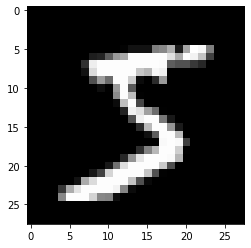

In [38]:
x_train, y_train, x_test, y_test = process_mnist_data()
img = x_train[0].reshape(28, 28, 1)
plt.imshow(img, cmap='gray')

In [39]:
m = parse_input_model()
c1 = ConvolutionLayerBatch(6, 5, 1, 2)
mnist_batch_1 = x_train[0:64].reshape(64, 28, 28, 1)
o = c1.forward(mnist_batch_1)
print(o.shape)

(64, 28, 28, 6)


In [40]:
o[0, :, :, 0]

array([[4.91951578e-02, 4.91951578e-02, 4.91951578e-02, 4.91951578e-02,
        4.91951578e-02, 4.91951578e-02, 4.91951578e-02, 4.91951578e-02,
        4.91951578e-02, 4.91951578e-02, 4.91951578e-02, 4.91951578e-02,
        4.91951578e-02, 4.91951578e-02, 4.91951578e-02, 4.91951578e-02,
        4.91951578e-02, 4.91951578e-02, 4.91951578e-02, 4.91951578e-02,
        4.91951578e-02, 4.91951578e-02, 4.91951578e-02, 4.91951578e-02,
        4.91951578e-02, 4.91951578e-02, 4.91951578e-02, 4.91951578e-02],
       [4.91951578e-02, 4.91951578e-02, 4.91951578e-02, 4.91951578e-02,
        4.91951578e-02, 4.91951578e-02, 4.91951578e-02, 4.91951578e-02,
        4.91951578e-02, 4.91951578e-02, 4.91951578e-02, 4.91951578e-02,
        4.91951578e-02, 4.91951578e-02, 4.91951578e-02, 4.91951578e-02,
        4.91951578e-02, 4.91951578e-02, 4.91951578e-02, 4.91951578e-02,
        4.91951578e-02, 4.91951578e-02, 4.91951578e-02, 4.91951578e-02,
        4.91951578e-02, 4.91951578e-02, 4.91951578e-02, 4.91951

In [41]:
a1 = ActivationLayer()
o1 = a1.forward(o)
o1.shape

(64, 28, 28, 6)

In [42]:
m1 = MaxPoolingLayerBatch(2, 2)
o2 = m1.forward(o1)
o2.shape

(64, 14, 14, 6)